<a href="https://colab.research.google.com/github/suvidhasrivastava/102103019_Sampling-/blob/main/Sampling_102103019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Creditcard_data.csv')

In [ ]:

X=df.drop('Class',axis=1)
y=df['Class']

In [ ]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
classfrequency=y.value_counts()

In [ ]:
classfrequency


772

In [ ]:
import matplotlib.pyplot as plt

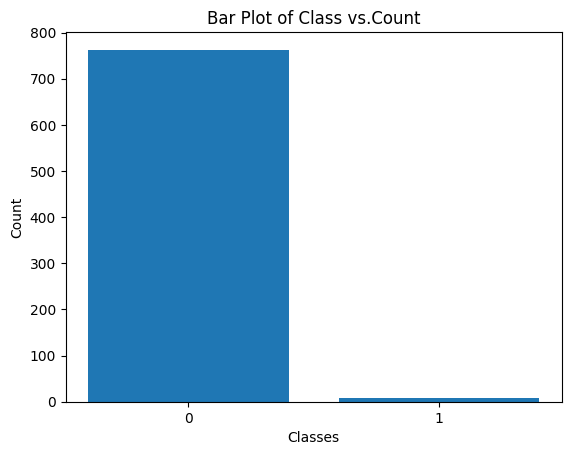

In [ ]:
plt.bar(classfrequency.index,classfrequency,tick_label=classfrequency.index)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Bar Plot of Class vs.Count')
plt.savefig('graph1.png')

In [ ]:
print(df[df['Class']==0].shape)
print(df[df['Class']==1].shape)

(763, 31)
(9, 31)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rs = RandomUnderSampler(sampling_strategy='auto', random_state=42,replacement=True)
X_undersampled, y_undersampled = rs.fit_resample(X,y)

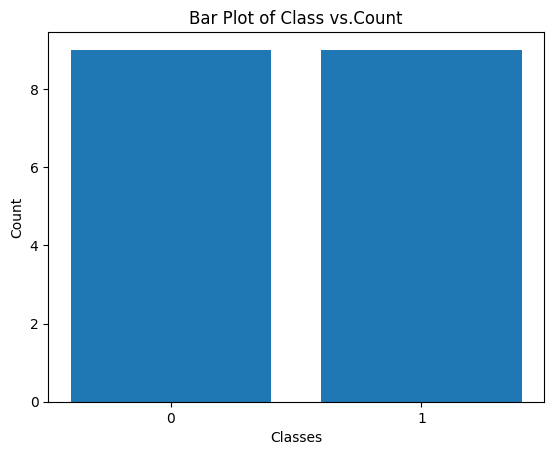

In [ ]:
plt.bar(y_undersampled.value_counts().index,y_undersampled.value_counts(),tick_label=y_undersampled.value_counts().index)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Bar Plot of Class vs.Count')


In [ ]:
rs = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_oversampled, y_oversampled = rs.fit_resample(X, y)


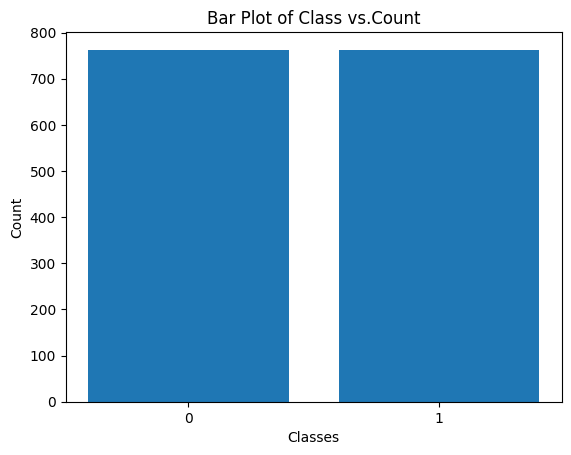

In [ ]:
plt.bar(y_oversampled.value_counts().index,y_oversampled.value_counts(),tick_label=y_undersampled.value_counts().index)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Bar Plot of Class vs.Count')
plt.savefig('graph2.png')

In [ ]:
Z = 1.96
p = 0.5
E = 0.05
sample_size = (Z**2 * p * (1 - p)) / E**2

In [ ]:
round(sample_size)

384

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X_oversampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.620899,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50
1522,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.043920,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99
1523,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.043920,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99
1524,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,0.002974,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00


In [ ]:
data=pd.concat([X_oversampled,y_oversampled],axis=1)

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Cluster
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1,2
1522,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1,1
1523,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1,1
1524,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1,2


In [ ]:
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'LogisticRegression': LogisticRegression()
}

In [ ]:
from random import sample
import numpy as np

In [ ]:
result = pd.DataFrame(columns=['Model', 'Sample1', 'Sample2', 'Sample3', 'Sample4', 'Sample5'])

In [ ]:
result['Model'] = [model_name for model_name,_ in models.items()]

In [ ]:
result

,Model,Sample1,Sample2,Sample3,Sample4,Sample5
0,RandomForest,NaN,NaN,NaN,NaN,NaN
1,XGBoost,NaN,NaN,NaN,NaN,NaN
2,KNN,NaN,NaN,NaN,NaN,NaN
3,SVM,NaN,NaN,NaN,NaN,NaN
4,LogisticRegression,NaN,NaN,NaN,NaN,NaN


SIMPLE RANDOM SAMPLING

In [ ]:
sample1 = data.sample(n=round(sample_size), random_state=42)

In [ ]:
sample1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Cluster
1439,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1,1
76,49,-0.549626,0.418949,1.729833,0.203065,-0.187012,0.253878,0.500894,0.251256,-0.227985,...,0.418529,-0.065133,0.264981,0.003958,0.395969,0.027182,0.043506,59.99,0,1
1010,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1,1
660,499,1.255439,0.307729,0.292700,0.699873,-0.428876,-1.088456,0.043840,-0.167739,0.128854,...,-0.882126,0.136846,0.327949,0.194459,0.096516,-0.027271,0.029491,1.98,0,2
1132,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1,2
756,564,-0.203837,0.532747,-0.339857,-0.730934,2.728163,3.535882,0.263680,0.919169,-0.194501,...,-0.271636,-0.157778,0.989458,0.228821,-0.545156,0.058120,0.035573,12.90,0,2
1074,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,1
867,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sample1.drop('Class',axis=1), sample1['Class'], test_size=0.3, random_state=42)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_sample1 = accuracy_score(y_test, y_pred)
    result.loc[result['Model'] == model_name, 'Sample1'] = accuracy_sample1
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_sample1:.4f}\n")

Model: RandomForest
Accuracy: 0.9914

Model: XGBoost
Accuracy: 0.9569

Model: KNN
Accuracy: 0.9483

Model: SVM
Accuracy: 0.6897

Model: LogisticRegression
Accuracy: 0.8621



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
result

,Model,Sample1,Sample2,Sample3,Sample4,Sample5
0,RandomForest,1.0,NaN,NaN,NaN,NaN
1,XGBoost,0.956897,NaN,NaN,NaN,NaN
2,KNN,0.948276,NaN,NaN,NaN,NaN
3,SVM,0.689655,NaN,NaN,NaN,NaN
4,LogisticRegression,0.862069,NaN,NaN,NaN,NaN


Simple Stratified sampling

In [ ]:
sample2= data.groupby("Class", group_keys=False).apply(lambda x:x.sample(n=int(384/2), random_state=42))

In [ ]:
sample2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
360,265,-0.491003,0.906953,1.645423,-0.083531,-0.195560,-0.710165,0.559119,0.116340,-0.538190,...,-0.168067,-0.517387,0.018650,0.491652,-0.277795,0.043841,0.253372,0.111749,9.03,0
262,184,-0.143256,0.743649,1.534072,1.062170,0.208187,-0.838623,0.524151,-0.294661,-0.478856,...,-0.205014,-0.460893,0.047407,0.339243,-0.779439,0.234456,-0.024125,-0.049898,1.98,0
757,566,1.166360,0.005061,0.497768,0.798920,-0.365524,-0.233421,-0.074210,-0.008325,0.437687,...,-0.195728,-0.365798,0.030729,0.123133,0.381749,0.296735,-0.007175,0.011905,18.56,0
195,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
336,246,-1.069200,1.239963,0.545157,1.005354,-0.025696,-0.910673,0.422442,0.049283,-0.564601,...,0.146555,0.602990,0.132656,0.427113,-0.084030,-0.417194,-0.897885,-0.462042,2.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
1506,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
1063,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
908,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sample2.drop('Class',axis=1), sample2['Class'], test_size=0.3, random_state=42)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_sample2 = accuracy_score(y_test, y_pred)
    result.loc[result['Model'] == model_name, 'Sample2'] = accuracy_sample2
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_sample2:.4f}\n")

Model: RandomForest
Accuracy: 0.9914

Model: XGBoost
Accuracy: 0.9828

Model: KNN
Accuracy: 0.8793

Model: SVM
Accuracy: 0.7155

Model: LogisticRegression
Accuracy: 0.9310



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Systematic Sampling

In [ ]:
k = 3

In [ ]:
i = np.random.randint(0,3)

In [ ]:
sample3 = data.iloc[i::3]

In [ ]:
 sample3

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Cluster
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,1
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,1
11,10,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0,1
14,12,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,0
1514,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1,2
1517,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,2
1520,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sample3.drop('Class',axis=1), sample3['Class'], test_size=0.3, random_state=42)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_sample3 = accuracy_score(y_test, y_pred)
    result.loc[result['Model'] == model_name, 'Sample3'] = accuracy_sample3
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_sample3:.4f}\n")

Model: RandomForest
Accuracy: 0.9935

Model: XGBoost
Accuracy: 0.9804

Model: KNN
Accuracy: 0.9477

Model: SVM
Accuracy: 0.7124

Model: LogisticRegression
Accuracy: 0.8824



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


BOOTSTRAP

In [ ]:
sample4 = df.sample(n=384, replace=True)

In [ ]:
sample4

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102,69,0.298503,2.142722,-1.542143,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,...,-0.290987,-0.000235,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.78,0
435,313,-0.907420,1.103912,1.288489,1.243612,-0.068032,0.214040,0.324000,0.436037,-0.437409,...,0.022520,0.399523,-0.049081,0.220258,-0.162924,-0.286994,0.015071,-0.104668,15.08,0
270,190,-0.549414,0.676861,2.151950,1.014523,-0.620012,0.076154,0.041578,0.342672,0.124723,...,0.212024,0.850203,-0.185597,0.544990,-0.130609,-0.196374,0.422119,0.203313,20.70,0
106,70,-0.426072,-0.060304,2.220828,0.024742,-0.584964,0.460623,-0.322526,0.434776,1.252404,...,0.149485,0.769878,-0.092634,0.150536,-0.234230,0.504710,0.069158,0.041024,21.80,0
71,46,-0.378245,0.732925,-0.120154,0.185755,2.594269,3.797183,0.059088,0.976768,-0.412661,...,-0.107582,-0.157140,-0.194659,1.013897,0.145503,-0.237620,0.411372,0.202788,11.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,125,-2.807065,1.183098,2.974779,2.801477,-0.475110,3.217829,-0.401608,0.384395,2.408675,...,-0.201782,1.461535,-0.000330,-0.581133,-0.101785,0.529386,0.362411,0.237647,43.71,0
252,172,-1.428535,1.793578,0.545758,-0.399309,0.673577,0.745919,-0.358475,-4.044724,0.232362,...,3.844729,-1.093705,0.256804,-0.869687,0.252491,-0.452726,0.055281,-0.153211,2.29,0
160,100,-0.378602,0.274579,-0.129488,-2.682799,-0.731375,-0.226354,-0.006949,-2.778983,-0.233232,...,1.426146,-2.776923,-0.466756,-0.714697,1.136720,-0.981993,0.356781,0.148444,182.95,0
255,180,-0.782666,1.017987,1.505851,0.920905,0.758765,0.392475,1.357625,-0.666453,1.071130,...,-0.410457,0.145970,-0.248113,-0.452121,0.014228,-0.281961,0.118371,-0.508471,23.63,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sample4.drop('Class',axis=1), sample4['Class'], test_size=0.3, random_state=42)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_sample4 = accuracy_score(y_test, y_pred)
    result.loc[result['Model'] == model_name, 'Sample4'] = accuracy_sample4
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_sample4:.4f}\n")

Model: RandomForest
Accuracy: 0.9828

Model: XGBoost
Accuracy: 0.9828

Model: KNN
Accuracy: 0.9828

Model: SVM
Accuracy: 0.9828

Model: LogisticRegression
Accuracy: 0.9828



crossvalidation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class',axis=1), data['Class'], test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
for model_name, model in models.items():
    # Perform cross-validation and get cross-validated accuracy scores
    cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    result.loc[result['Model'] == model_name, 'Sample5'] =cross_val_scores.mean()
    # Print the cross-validated accuracy score for each model
    print(f"Model: {model_name}")
    print(f"Cross-Validated Accuracy: {cross_val_scores.mean():.4f} \n")

Model: RandomForest
Cross-Validated Accuracy: 0.9883 

Model: XGBoost
Cross-Validated Accuracy: 0.9844 

Model: KNN
Cross-Validated Accuracy: 0.9883 

Model: SVM
Cross-Validated Accuracy: 0.9883 

Model: LogisticRegression
Cross-Validated Accuracy: 0.9819 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
result

,Model,Sample1,Sample2,Sample3,Sample4,Sample5
0,RandomForest,0.991379,0.991379,0.993464,0.982759,0.988345
1,XGBoost,0.956897,0.982759,0.980392,0.982759,0.984449
2,KNN,0.948276,0.87931,0.947712,0.982759,0.988345
3,SVM,0.689655,0.715517,0.712418,0.982759,0.988345
4,LogisticRegression,0.862069,0.931034,0.882353,0.982759,0.981868
